# Sur les avantages familiaux

In [14]:
%matplotlib inline
import matplotlib.pyplot as plt
from openfisca_matplotlib import graphs

In [15]:
from datetime import date  # module nécessaire pour la définition des dates, dont notamment les dates de naissances
import openfisca_france    # module décrivant le système socio-fiscal français

TaxBenefitSystem = openfisca_france.init_country()  # Initialisation de la classe décrivant le système socio-fiscal français
tax_benefit_system = TaxBenefitSystem()  # Création d'une instance du système socio-fiscal français 

In [16]:
salaire_imposable_maximal = 80000

In [18]:
def couple_avec_enfants(nombre_enfants = 0, year = 2014):
    enfant = [dict(
        birth = date(2005, 1, 1),
        )]
    enfants = enfant * nombre_enfants
    simulation = tax_benefit_system.new_scenario().init_single_entity(
        axes = [
            dict(
                count = 100,
                min = 0,
                max = salaire_imposable_maximal * 3,
                name = 'salaire_imposable',
                ),
            ],
        period = "{}:3".format(year-2),
        parent1 = dict(
            birth = date(1980, 1, 1),
            statmarit = 1,
            ),
        parent2 = dict(
            birth = date(1980, 1, 1),
            statmarit = 1,
            ),
        enfants = enfants,
        menage = dict(
            loyer = 1000 * 3,
            statut_occupation = 4,
            ),
        ).new_simulation(debug = True)
    return simulation

## Gain lié à l'enfant marginal

In [19]:
def gain_enfant_marginal(rang_enfant, year = 2014):
    assert rang_enfant >= 1
    situation_initiale = couple_avec_enfants(rang_enfant-1, year)
    situation_finale = couple_avec_enfants(rang_enfant, year)
    revdisp_initial = situation_initiale.calculate("revdisp", period = year)
    revdisp_final = situation_finale.calculate("revdisp", period = year)
    return revdisp_final - revdisp_initial

In [20]:
couple_0_enfant = couple_avec_enfants(nombre_enfants = 0)
salaire_imposable = couple_0_enfant.calculate('salaire_imposable', period = 2014)[:200:2] 
# salaire imposable est une variable associée à l'entité individu

In [21]:
couple_1_enfant = couple_avec_enfants(nombre_enfants = 2, year = 2013)
couple_1_enfant.calculate_add('revdisp', period = 2013)

array([ 11759.87402344,  12312.06445312,  12864.25195312,  13416.43945312,
        13968.62890625,  14520.81738281,  15073.00585938,  15625.1953125 ,
        16177.38183594,  16729.57226562,  17281.75976562,  17821.45703125,
        18336.90820312,  18856.9375    ,  19376.96484375,  19892.4140625 ,
        20412.44335938,  20905.10351562,  21457.29101562,  22009.47851562,
        22561.66796875,  23113.859375  ,  23666.04492188,  24218.23242188,
        24770.421875  ,  25322.61328125,  25874.80078125,  26426.98828125,
        26979.17773438,  27531.36328125,  28083.55273438,  28635.7421875 ,
        29187.93164062,  29740.11914062,  30292.30859375,  30903.140625  ,
        31350.046875  ,  32158.12890625,  32966.20703125,  33774.2890625 ,
        34582.37109375,  35059.7578125 ,  35506.11328125,  36285.671875  ,
        37093.75390625,  37901.8359375 ,  38645.62109375,  39393.71875   ,
        39894.9375    ,  40189.9140625 ,  40900.796875  ,  41607.08203125,
        42313.375     ,  

(0, 80000)

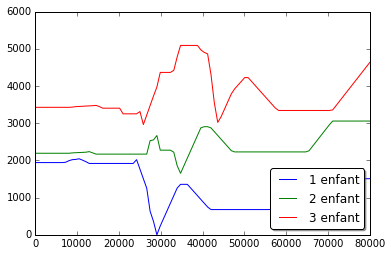

In [22]:
fig = plt.figure()
for rang_enfant in range(1, 4):
    plt.plot(salaire_imposable, gain_enfant_marginal(rang_enfant, year = 2014), label = "{} enfant".format(rang_enfant))
plt.legend(loc = 4, shadow=True, fancybox=True)
plt.xlim([0,salaire_imposable_maximal])

Exercice: Faire le même graphe en utilisant une boucle

(0, 80000)

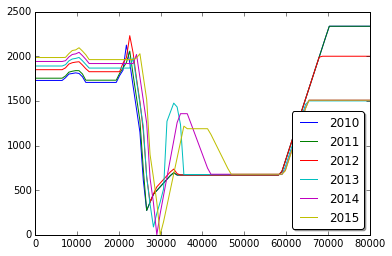

In [23]:
fig = plt.figure()
rang_enfant = 1
for year in range(2010, 2016):
    plt.plot(salaire_imposable, gain_enfant_marginal(rang_enfant, year = year), label = "{}".format(year))
plt.legend(loc = 4, shadow=True, fancybox=True)
plt.xlim([0, salaire_imposable_maximal])

(0, 80000)

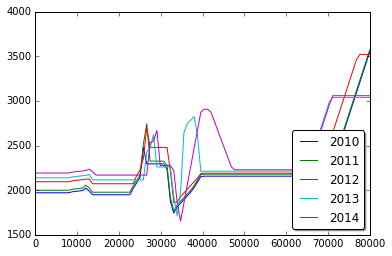

In [24]:
fig = plt.figure()
rang_enfant = 2
for year in range(2010, 2015):
    plt.plot(salaire_imposable, gain_enfant_marginal(rang_enfant, year = year), label = "{}".format(year))
plt.legend(loc = 4, shadow=True, fancybox=True)
plt.xlim([0, salaire_imposable_maximal])

(0, 80000)

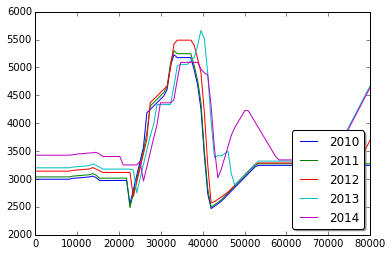

In [25]:
fig = plt.figure()
rang_enfant = 3
for year in range(2010, 2015):
    plt.plot(salaire_imposable, gain_enfant_marginal(rang_enfant, year = year), label = "{}".format(year))
plt.legend(loc = 4, shadow=True, fancybox=True)
plt.xlim([0, salaire_imposable_maximal])

(0, 80000)

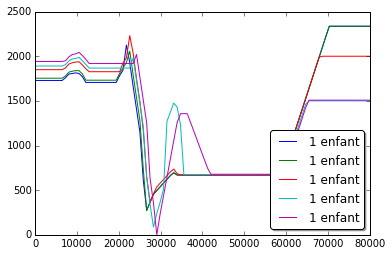

In [26]:
fig = plt.figure()
rang_enfant = 1
for year in range(2010, 2015):
    plt.plot(salaire_imposable, gain_enfant_marginal(rang_enfant, year = year), label = "{} enfant".format(rang_enfant))
plt.legend(loc = 4, shadow=True, fancybox=True)
plt.xlim([0, salaire_imposable_maximal])